# Monte Carlo sampling

In [25]:
import numpy as np

num_samples = 10_000
radius = 1.

# Create samples drawn from a uniform distribution distributed between 0 and radius. 
# We need x and y coordinates, i.e., two dimensions, so we need a 2 x num_samples array.
sample_coordinates = np.random.uniform(0., radius, [2, num_samples])
print(f"{np.shape(sample_coordinates)=}")
# calculate the shortest distance between each sample point and the origin.
distance = np.linalg.norm(sample_coordinates, axis = 0)
print(f"{np.shape(distance)=}")


np.shape(sample_coordinates)=(2, 10000)
np.shape(distance)=(10000,)


In [26]:
# Find all samples within the circle.
inside_quadrant = np.where(distance < radius)
# Count the number of samples within the quadrant.
inside_count = np.shape(inside_quadrant)[1]
# estimate pi from the ratio of the area of a quarter circle and square.
pi_estimate = 4*inside_count/num_samples

print(f"estimate pi = {pi_estimate}")

estimate pi = 3.1224


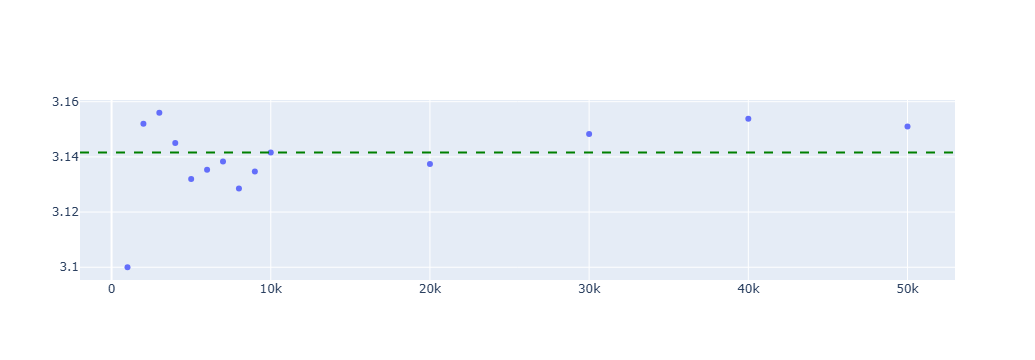

In [27]:
from typing import List
import math
import plotly.graph_objects as go


def estimate_pi(num_samples: int, intervals: List[int]) -> np.ndarray:
    sample_coordinates = np.random.uniform(0., 1., [2, num_samples])
    distance = np.linalg.norm(sample_coordinates, axis = 0)
    
    pi_estimate = np.zeros(np.shape(intervals), dtype=np.float64)
    for index, value in enumerate(intervals):
        inside_quadrant = np.where(distance[0:value] < 1.)
        inside_count = np.shape(inside_quadrant)[1]
        pi_estimate[index] = 4*inside_count/value
              
    return pi_estimate  

nsamples = 50_000
intervals_list = [_ for _ in range(1_000, 10_000, 1_000)] + [_ for _ in range(10_000, nsamples+10_000, 10_000)]
interval_estimates = estimate_pi(nsamples, intervals_list)
errors = np.abs(np.pi - interval_estimates)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=intervals_list, y=interval_estimates,
                    mode='markers', name='markers'))
fig.add_hline(y=math.pi, line_dash='dash', line_color='green')
fig.show()


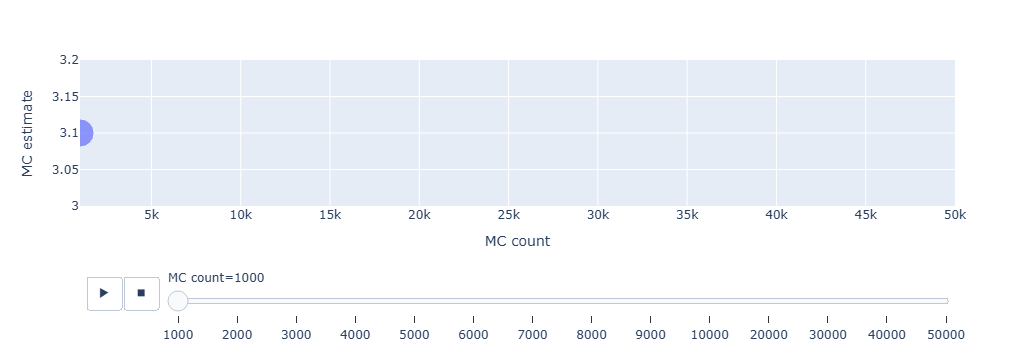

In [28]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame(
    {
        "MC count": intervals_list,
        "MC estimate": interval_estimates,
        "MC error": errors,
    }
)


# Create traces
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=intervals_list, y=interval_estimates,
#                    mode='markers', name='markers'))
#fig.add_hline(y=math.pi, line_dash='dash', line_color='green')
#fig.show()


px.scatter(df, x="MC count", y="MC estimate", animation_frame="MC count", animation_group="MC estimate", size = "MC error",
           range_x=[1_000, 50_000], range_y=[3.0, 3.2])